In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             import torch
import torchvision
from project1_model import project1_model
from torchsummary import summary
from torchtoolbox.transform import CIFAR10Policy, Cutout
from torchvision.transforms import Compose, RandomCrop, RandomHorizontalFlip, ToTensor, Normalize
import matplotlib.pyplot as plt

In [2]:
Epoch = 160
Batch_size = 128
Loss = torch.nn.CrossEntropyLoss()


In [3]:
transform_train = Compose(
        [RandomCrop(32, padding=4), RandomHorizontalFlip(), CIFAR10Policy,
         ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
transform_test = Compose(
        [ToTensor(), Normalize(mean=[0.491, 0.482, 0.446], std=[0.247, 0.243, 0.261])])
trainingdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=True, download=True, transform=transform_train)
testdata = torchvision.datasets.CIFAR10('./CIFAR10/', train=False, download=True, transform=transform_test)


trainDataLoader = torch.utils.data.DataLoader(trainingdata, Batch_size, shuffle=True)
testDataLoader = torch.utils.data.DataLoader(testdata, Batch_size, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
model_1 = project1_model().cuda()
optimizer_1 = torch.optim.Adam(model_1.parameters(), lr=3e-4, weight_decay=5e-4)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_1 = []
test_loss_history_1 = []
test_acc_history_1 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_1.zero_grad()
        predicted_output = model_1(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_1.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_1(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader)
    test_loss = test_loss / len(testDataLoader)
    test_acc = test_acc / test_total

    train_loss_history_1.append(train_loss)
    test_loss_history_1.append(test_loss)
    test_acc_history_1.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.8200352762056433, Test loss 1.3664526713045337, Test acc 0.5029
Epoch 1, Train loss 1.3482451602016263, Test loss 1.013743670680855, Test acc 0.645
Epoch 2, Train loss 1.0956889415336082, Test loss 0.8746933710726001, Test acc 0.698
Epoch 3, Train loss 0.95457804355475, Test loss 0.7463215487667277, Test acc 0.7473
Epoch 4, Train loss 0.8737743963365969, Test loss 0.7123698875119414, Test acc 0.7579
Epoch 5, Train loss 0.8110719556393831, Test loss 0.6533525257925444, Test acc 0.7767
Epoch 6, Train loss 0.7570413016449765, Test loss 0.6291572715662703, Test acc 0.7886
Epoch 7, Train loss 0.7167628767240383, Test loss 0.6064111522481411, Test acc 0.7936
Epoch 8, Train loss 0.6888593647943433, Test loss 0.5474358521684816, Test acc 0.8114
Epoch 9, Train loss 0.6593527703943765, Test loss 0.5163041300411466, Test acc 0.8263
Epoch 10, Train loss 0.6333279642455109, Test loss 0.525563077836097, Test acc 0.8226
Epoch 11, Train loss 0.6151732784860274, Test loss 0.496588

Epoch 94, Train loss 0.26716750492449004, Test loss 0.2654695146823231, Test acc 0.9074
Epoch 95, Train loss 0.26145222583009153, Test loss 0.2985450763113891, Test acc 0.9049
Epoch 96, Train loss 0.26193074882030487, Test loss 0.29339360879569115, Test acc 0.9061
Epoch 97, Train loss 0.2650517642383685, Test loss 0.2795825110206121, Test acc 0.9085
Epoch 98, Train loss 0.26145648881983574, Test loss 0.2896255892288836, Test acc 0.9058
Epoch 99, Train loss 0.2605254663645154, Test loss 0.2705318327945999, Test acc 0.9136
Epoch 100, Train loss 0.26270573593847585, Test loss 0.2712790698190279, Test acc 0.9126
Epoch 101, Train loss 0.25338976946480746, Test loss 0.30478607834894444, Test acc 0.9021
Epoch 102, Train loss 0.2636075349300719, Test loss 0.2855661556690554, Test acc 0.9076
Epoch 103, Train loss 0.2557529323469952, Test loss 0.2871810678817049, Test acc 0.9075
Epoch 104, Train loss 0.25619526055005504, Test loss 0.27132577798034574, Test acc 0.9104
Epoch 105, Train loss 0.2603

In [5]:
model_2 = project1_model().cuda()
optimizer_2 = torch.optim.NAdam(model_2.parameters(), lr=3e-4, weight_decay=5e-4)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_2 = []
test_loss_history_2 = []
test_acc_history_2 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_2.zero_grad()
        predicted_output = model_2(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_2.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_2(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader)
    test_loss = test_loss / len(testDataLoader)
    test_acc = test_acc / test_total

    train_loss_history_2.append(train_loss)
    test_loss_history_2.append(test_loss)
    test_acc_history_2.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 1.8235368036553072, Test loss 1.3668618775621246, Test acc 0.504
Epoch 1, Train loss 1.3159996330585626, Test loss 0.9715213066414942, Test acc 0.657
Epoch 2, Train loss 1.0519200583248187, Test loss 0.8525547015516064, Test acc 0.701
Epoch 3, Train loss 0.920811634996663, Test loss 0.7094652188729637, Test acc 0.7608
Epoch 4, Train loss 0.837080004422561, Test loss 0.6807458264918267, Test acc 0.771
Epoch 5, Train loss 0.7767449815559875, Test loss 0.6005182296414918, Test acc 0.7964
Epoch 6, Train loss 0.7229813328179557, Test loss 0.6164375932156285, Test acc 0.7956
Epoch 7, Train loss 0.6765945953176454, Test loss 0.5431858538826809, Test acc 0.8154
Epoch 8, Train loss 0.6561247284150185, Test loss 0.5434966498537909, Test acc 0.8145
Epoch 9, Train loss 0.6285533379868168, Test loss 0.49567995871169657, Test acc 0.8315
Epoch 10, Train loss 0.6048593770360093, Test loss 0.5009304032295565, Test acc 0.826
Epoch 11, Train loss 0.5840425560693911, Test loss 0.476071

Epoch 94, Train loss 0.25739999218365117, Test loss 0.28057426968707316, Test acc 0.9118
Epoch 95, Train loss 0.26314403915115636, Test loss 0.2716567289980152, Test acc 0.9152
Epoch 96, Train loss 0.2615198906310989, Test loss 0.2772177850143819, Test acc 0.9076
Epoch 97, Train loss 0.25751711710182296, Test loss 0.2884475769875925, Test acc 0.9067
Epoch 98, Train loss 0.2671095670755867, Test loss 0.2517379648700545, Test acc 0.9173
Epoch 99, Train loss 0.25596126128950386, Test loss 0.260317605696147, Test acc 0.9114
Epoch 100, Train loss 0.25252172804397083, Test loss 0.2587214839420741, Test acc 0.9148
Epoch 101, Train loss 0.2515611188567203, Test loss 0.2660222540173349, Test acc 0.9175
Epoch 102, Train loss 0.25487891963833126, Test loss 0.26522072612107556, Test acc 0.9136
Epoch 103, Train loss 0.2579574696052715, Test loss 0.2658789206909228, Test acc 0.913
Epoch 104, Train loss 0.25174349977079863, Test loss 0.2604901398284526, Test acc 0.9129
Epoch 105, Train loss 0.2566107

In [6]:
model_4 = project1_model().cuda()
optimizer_4 = torch.optim.RAdam(model_4.parameters(), lr=3e-4, weight_decay=5e-4)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_4 = []
test_loss_history_4 = []
test_acc_history_4 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_4.zero_grad()
        predicted_output = model_4(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_4.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_4(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader)
    test_loss = test_loss / len(testDataLoader)
    test_acc = test_acc / test_total

    train_loss_history_4.append(train_loss)
    test_loss_history_4.append(test_loss)
    test_acc_history_4.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 2.0460208910505484, Test loss 1.6269069970408572, Test acc 0.415
Epoch 1, Train loss 1.6843892750532732, Test loss 1.3249432995349546, Test acc 0.5303
Epoch 2, Train loss 1.398555555307042, Test loss 1.0791349109215072, Test acc 0.6183
Epoch 3, Train loss 1.169065064176574, Test loss 0.8977842670452746, Test acc 0.6918
Epoch 4, Train loss 1.0285841026879332, Test loss 0.811644772185555, Test acc 0.7216
Epoch 5, Train loss 0.9246378768130642, Test loss 0.7215473252006724, Test acc 0.7534
Epoch 6, Train loss 0.8557791264770586, Test loss 0.7035449241535573, Test acc 0.7608
Epoch 7, Train loss 0.8059798293101513, Test loss 0.6056773888913891, Test acc 0.7948
Epoch 8, Train loss 0.757285001180361, Test loss 0.589990526815004, Test acc 0.8012
Epoch 9, Train loss 0.7164388020020311, Test loss 0.5843063664587238, Test acc 0.8055
Epoch 10, Train loss 0.688064800351477, Test loss 0.5412741050690035, Test acc 0.8149
Epoch 11, Train loss 0.6598696787186595, Test loss 0.5188021

Epoch 94, Train loss 0.26344393050807824, Test loss 0.2873774263300473, Test acc 0.9069
Epoch 95, Train loss 0.2661994166691285, Test loss 0.30218162029227125, Test acc 0.9006
Epoch 96, Train loss 0.2669545975144562, Test loss 0.2880308798785451, Test acc 0.9082
Epoch 97, Train loss 0.2578822534026392, Test loss 0.28634005709539484, Test acc 0.9095
Epoch 98, Train loss 0.2641120529388223, Test loss 0.2957290380815916, Test acc 0.9086
Epoch 99, Train loss 0.26072722490486283, Test loss 0.274536427063278, Test acc 0.9129
Epoch 100, Train loss 0.2616932602108592, Test loss 0.27714146966043907, Test acc 0.9097
Epoch 101, Train loss 0.2596033092426217, Test loss 0.28863052778606174, Test acc 0.9059
Epoch 102, Train loss 0.26222047800450676, Test loss 0.27258258510994005, Test acc 0.911
Epoch 103, Train loss 0.2619518802294036, Test loss 0.28956290947485575, Test acc 0.9072
Epoch 104, Train loss 0.25873227484162203, Test loss 0.2568594589829445, Test acc 0.9178
Epoch 105, Train loss 0.253602

In [7]:
model_3 = project1_model().cuda()
optimizer_3 = torch.optim.SGD(model_3.parameters(), lr=1e-3, momentum=0.9, weight_decay=5e-4)

start = torch.cuda.Event(enable_timing=True)
end = torch.cuda.Event(enable_timing=True)

train_loss_history_3 = []
test_loss_history_3 = []
test_acc_history_3 = []

start.record()

for epoch in range(Epoch):
    train_loss = 0.0
    test_loss = 0.0
    test_acc = 0.0

    train_total = 0.0
    test_total = 0.0

    for i, data in enumerate(trainDataLoader):
        x, labels = data
        x = x.cuda()
        train_total+=labels.size(0)
        labels = labels.cuda()
        optimizer_3.zero_grad()
        predicted_output = model_3(x)
        fit = Loss(predicted_output, labels)
        fit.backward()
        optimizer_3.step()
        train_loss += fit.item()

    for i, data in enumerate(testDataLoader):
        with torch.no_grad():
            x, labels = data
            test_total += labels.size(0)
            x = x.cuda()
            labels = labels.cuda()
            predicted_output = model_3(x)
            fit = Loss(predicted_output, labels)
            test_loss += fit.item()
            test_acc += (torch.eq(torch.max(predicted_output, 1)[1], labels).sum()).data.cpu().numpy()

    train_loss = train_loss / len(trainDataLoader)
    test_loss = test_loss / len(testDataLoader)
    test_acc = test_acc / test_total

    train_loss_history_3.append(train_loss)
    test_loss_history_3.append(test_loss)
    test_acc_history_3.append(test_acc)

    print('Epoch %s, Train loss %s, Test loss %s, Test acc %s' % (epoch, train_loss, test_loss, test_acc))

end.record()
torch.cuda.synchronize()
print(start.elapsed_time(end))

Epoch 0, Train loss 2.0324348519220377, Test loss 1.6500230499460726, Test acc 0.3887
Epoch 1, Train loss 1.7314096362999334, Test loss 1.4223897819277607, Test acc 0.4868
Epoch 2, Train loss 1.5292572834912468, Test loss 1.2572096495688716, Test acc 0.5501
Epoch 3, Train loss 1.3489239654882486, Test loss 1.0947020385838762, Test acc 0.6098
Epoch 4, Train loss 1.2218614269400496, Test loss 1.0143852958196327, Test acc 0.6429
Epoch 5, Train loss 1.1120206074946373, Test loss 0.943797213367269, Test acc 0.6712
Epoch 6, Train loss 1.029502641209556, Test loss 0.8609799908686288, Test acc 0.6967
Epoch 7, Train loss 0.9666477787830031, Test loss 0.7785645414002335, Test acc 0.7293
Epoch 8, Train loss 0.9051766090685754, Test loss 0.7364853273464155, Test acc 0.7454
Epoch 9, Train loss 0.8575645276652578, Test loss 0.7267246812204772, Test acc 0.7468
Epoch 10, Train loss 0.8108568848551386, Test loss 0.6863466614409338, Test acc 0.7631
Epoch 11, Train loss 0.7759769618358758, Test loss 0.64

Epoch 94, Train loss 0.24829038299258102, Test loss 0.32758220407781724, Test acc 0.8954
Epoch 95, Train loss 0.24652146027825983, Test loss 0.32688565420199045, Test acc 0.8964
Epoch 96, Train loss 0.24647104562929525, Test loss 0.3270477969435197, Test acc 0.893
Epoch 97, Train loss 0.24713608607306808, Test loss 0.31824772833268855, Test acc 0.8997
Epoch 98, Train loss 0.23671942530080792, Test loss 0.33003976016859465, Test acc 0.8989
Epoch 99, Train loss 0.23337361351836977, Test loss 0.3240053504705429, Test acc 0.8995
Epoch 100, Train loss 0.23081664493321763, Test loss 0.31273018446149703, Test acc 0.9007
Epoch 101, Train loss 0.23875000558393386, Test loss 0.33186434907249257, Test acc 0.8976
Epoch 102, Train loss 0.2350448374172001, Test loss 0.3299237467065642, Test acc 0.8979
Epoch 103, Train loss 0.2292166165340587, Test loss 0.3340813679785668, Test acc 0.8933
Epoch 104, Train loss 0.2352854734872613, Test loss 0.32858146048044856, Test acc 0.894
Epoch 105, Train loss 0.2

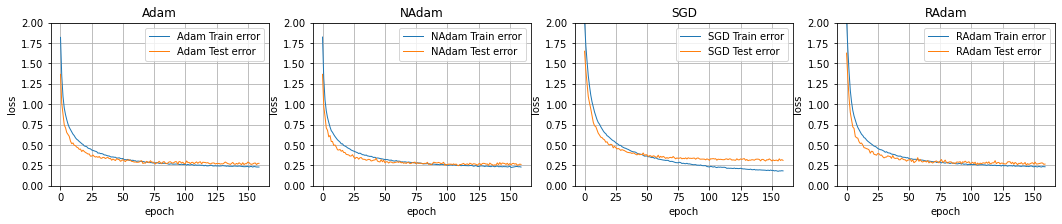

In [8]:
plt.subplots(figsize=(18,3))
plt.subplots_adjust(wspace=0.2)
plt.subplot(1,4,1)
plt.plot(range(Epoch), train_loss_history_1, '-', linewidth=1, label='Adam Train error')
plt.plot(range(Epoch), test_loss_history_1, '-', linewidth=1, label='Adam Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Adam')
plt.ylim((0,2))
plt.grid(True)
plt.legend()
plt.subplot(1,4,2)
plt.plot(range(Epoch), train_loss_history_2, '-', linewidth=1, label='NAdam Train error')
plt.plot(range(Epoch), test_loss_history_2, '-', linewidth=1, label='NAdam Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('NAdam')
plt.ylim((0,2))
plt.grid(True)
plt.legend()
plt.subplot(1,4,3)
plt.plot(range(Epoch), train_loss_history_3, '-', linewidth=1, label='SGD Train error')
plt.plot(range(Epoch), test_loss_history_3, '-', linewidth=1, label='SGD Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('SGD')
plt.ylim((0,2))
plt.grid(True)
plt.legend()
plt.subplot(1,4,4)
plt.plot(range(Epoch), train_loss_history_4, '-', linewidth=1, label='RAdam Train error')
plt.plot(range(Epoch), test_loss_history_4, '-', linewidth=1, label='RAdam Test error')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('RAdam')
plt.ylim((0,2))
plt.grid(True)
plt.legend()

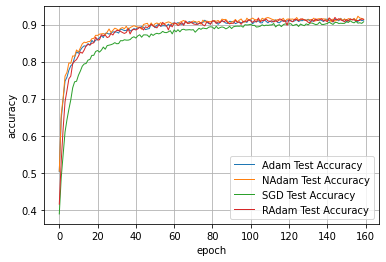

In [9]:
plt.plot(range(Epoch), test_acc_history_1, '-', linewidth=1, label='Adam Test Accuracy')
plt.plot(range(Epoch), test_acc_history_2, '-', linewidth=1, label='NAdam Test Accuracy')
plt.plot(range(Epoch), test_acc_history_3, '-', linewidth=1, label='SGD Test Accuracy')
plt.plot(range(Epoch), test_acc_history_4, '-', linewidth=1, label='RAdam Test Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.grid(True)
plt.legend()

In [10]:
print('Best Adam Test acc: %s' % (max(test_acc_history_1)))
print('Best NAdam Test acc: %s' % (max(test_acc_history_2)))
print('Best SGD Test acc: %s' % (max(test_acc_history_3)))
print('Best RAdam Test acc: %s' % (max(test_acc_history_4)))

Best Adam Test acc: 0.9169
Best NAdam Test acc: 0.9225
Best SGD Test acc: 0.9103
Best RAdam Test acc: 0.9195
